In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import scipy.optimize
import scipy.spatial
from IPython import display
from ipywidgets import interact ,widgets
import scipy.stats as stats
import math
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [3]:
data = fetch_openml(name='letter', version=1)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [5]:
X=data.data
y=data.target

In [6]:
len(X)

20000

In [7]:
X_train1,X_test1,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [8]:
X_train=scaler.fit(X_train1).transform(X_train1)
X_test=scaler.fit(X_test1).transform(X_test1)

# DECISION TREE #

In [9]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=15)

In [10]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
model.score(X_test,y_test)

0.8774

In [12]:
y_predicted=model.predict(X_test)

In [13]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of decision tree classifier for letter dataset')

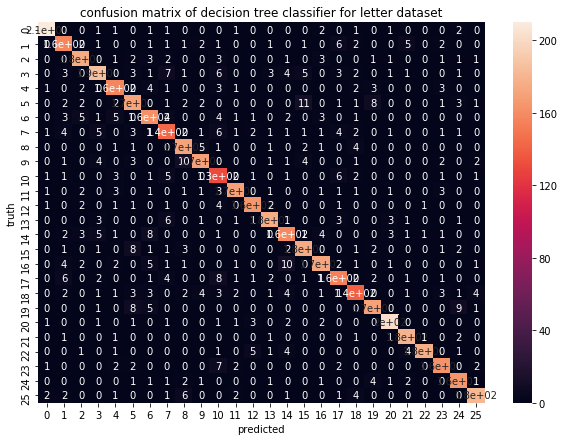

In [14]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of decision tree classifier for letter dataset")
 

In [15]:
FP1 = cm.sum(axis=0) - np.diag(cm)  
FN1 = cm.sum(axis=1) - np.diag(cm)
TP1 = np.diag(cm)
TN1 = cm.sum() - (FP1 + FN1 + TP1)

# Sensitivity, hit rate, recall, or true positive rate
TPR1 = TP1/(TP1+FN1)
# Specificity or true negative rate
TNR1 = TN1/(TN1+FP1) 
# Precision or positive predictive value
PPV1 = TP1/(TP1+FP1)
# Negative predictive value
NPV1 = TN1/(TN1+FN1)
# Fall out or false positive rate
FPR1 = FP1/(FP1+TN1)
# False negative rate
FNR1 = FN1/(TP1+FN1)
# False discovery rate
FDR1 = FP1/(TP1+FP1)

# Overall accuracy
ACC = (TP1+TN1)/(TP1+FP1+FN1+TN1)
print(FP1,FN1,TP1,TN1,FPR1,TPR1)

[ 9 32 19 26 26 36 37 38 29 17 52 14 14 16 34 26 20 31 26 20 14 16  3 20
 24 14] [11 24 20 41 20 37 30 37 16 29 23 20 14 21 31 23 31 31 37 24 13  8 18 18
 16 20] [210 157 175 186 157 172 162 143 171 170 131 170 165 177 159 175 173 155
 140 170 203 179 177 163 165 182] [4770 4787 4786 4747 4797 4755 4771 4782 4784 4784 4794 4796 4807 4786
 4776 4776 4776 4783 4797 4786 4770 4797 4802 4799 4795 4784] [0.00188324 0.00664038 0.00395421 0.00544731 0.00539084 0.00751409
 0.00769551 0.00788382 0.00602535 0.00354093 0.0107305  0.0029106
 0.00290396 0.00333195 0.00706861 0.00541441 0.00417014 0.00643955
 0.00539084 0.00416146 0.00292642 0.00332433 0.00062435 0.00415024
 0.00498029 0.00291788] [0.95022624 0.86740331 0.8974359  0.81938326 0.88700565 0.82296651
 0.84375    0.79444444 0.9144385  0.85427136 0.85064935 0.89473684
 0.92178771 0.89393939 0.83684211 0.88383838 0.84803922 0.83333333
 0.79096045 0.87628866 0.93981481 0.95721925 0.90769231 0.90055249
 0.91160221 0.9009901 ]


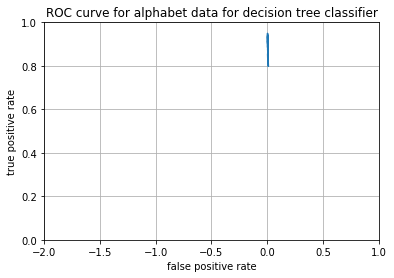

In [16]:
plt.plot(FPR1,TPR1)
plt.xlim([-2.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for alphabet data for decision tree classifier")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)

In [17]:
d11=pd.DataFrame(FP1,columns=['decisiontreefp'])
d12=pd.DataFrame(TP1,columns=['decisiontreetp'])
d13=pd.DataFrame(y_predicted,columns=['prd1'])
d14=pd.DataFrame(TN1,columns=['decisiontreetn'])
d15=pd.DataFrame(TPR1,columns=['decisiontreettpr'])
d16=pd.DataFrame(TNR1,columns=['decisiontreetnr'])
d17=pd.DataFrame(PPV1,columns=['decisiontreeppv'])
d18=pd.DataFrame(NPV1,columns=['decisiontreenpv'])

# LOGISTIC REGRESSION #

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [19]:
lr.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
lr.score(X_test,y_test)

0.7142

In [21]:
y_predicted=lr.predict(X_test)

In [22]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of logistic regression classifier for alphabet dataset')

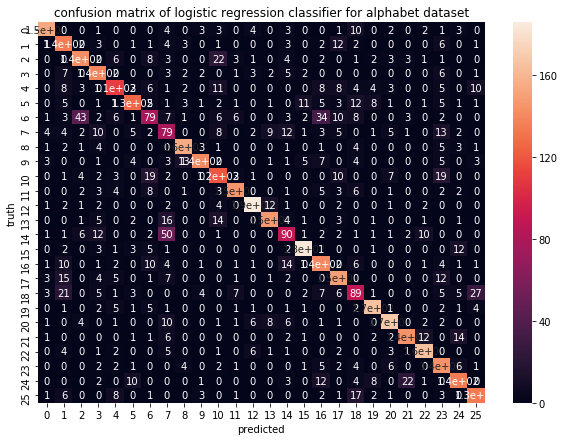

In [23]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of logistic regression classifier for alphabet dataset")

In [24]:
FP2 = cm.sum(axis=0) - np.diag(cm)  
FN2 = cm.sum(axis=1) - np.diag(cm)
TP2 = np.diag(cm)
TN2 = cm.sum() - (FP2 + FN2 + TP2)

# Sensitivity, hit rate, recall, or true positive rate
TPR2 = TP2/(TP2+FN2)
# Specificity or true negative rate
TNR2 = TN2/(TN2+FP2) 
# Precision or positive predictive value
PPV2 = TP2/(TP2+FP2)
# Negative predictive value
NPV2 = TN2/(TN2+FN2)
# Fall out or false positive rate
FPR2 = FP2/(FP2+TN2)
# False negative rate
FNR2 = FN2/(TP2+FN2)
# False discovery rate
FDR2 = FP2/(TP2+FP2)

# Overall accuracy
ACC = (TP2+TN2)/(TP2+FP2+FN2+TN2)
print(FP2,FN2,TP2,TN2)

[ 22  92  67  66  47  35  74 130  29  18  80  27  25  35  69  28  97  71
  85  31  37  32  33  98  51  50] [ 37  40  60  34  76  69 138  89  27  50  71  41  30  49  93  31  58  51
  97  29  44  42  27  37  63  46] [154 135 143 139 111 127  79  79 155 141 120 146 186 147  90 184 140 149
  89 166 169 144 165 144 135 134] [4787 4733 4730 4761 4766 4769 4709 4702 4789 4791 4729 4786 4759 4769
 4748 4757 4705 4729 4729 4774 4750 4782 4775 4721 4751 4770]


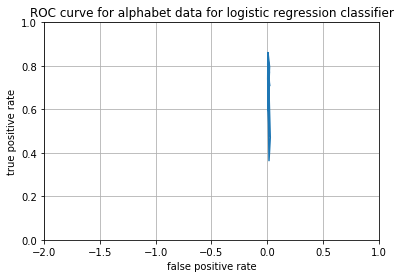

In [25]:
plt.plot(FPR2,TPR2)
plt.xlim([-2.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for alphabet data for logistic regression classifier")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)

In [26]:
d01=pd.DataFrame(FP2,columns=['logisticregfp'])

In [27]:
d02=pd.DataFrame(TP2,columns=['logisticregtp'])
d03=pd.DataFrame(y_predicted,columns=['prd2'])
d04=pd.DataFrame(TN2,columns=['logisticregtn'])
d05=pd.DataFrame(TPR2,columns=['logisticregtpr'])
d06=pd.DataFrame(TNR2,columns=['logisticregtnr'])
d07=pd.DataFrame(PPV2,columns=['logisticregppv'])
d08=pd.DataFrame(NPV2,columns=['logisticregnpv'])

# KNN #

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn=KNeighborsClassifier(n_neighbors=15)

In [30]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [31]:
knn.score(X_test,y_test)

0.926

In [32]:
y_predicted=knn.predict(X_test)

In [33]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of KNN classifier for letter dataset')

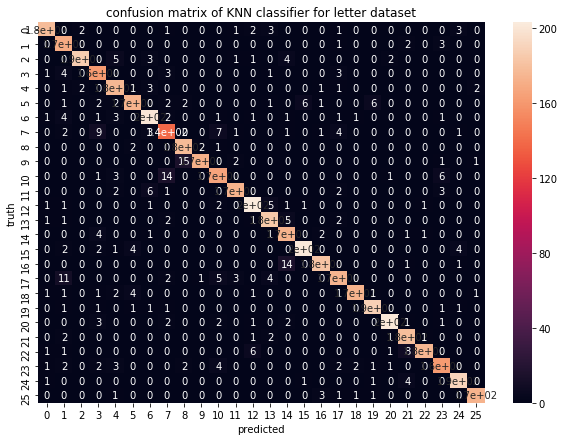

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of KNN classifier for letter dataset")

In [35]:
FP3 = cm.sum(axis=0) - np.diag(cm)  
FN3 = cm.sum(axis=1) - np.diag(cm)
TP3 = np.diag(cm)
TN3 = cm.sum() - (FP3 + FN3 + TP3)

# Sensitivity, hit rate, recall, or true positive rate
TPR3 = TP3/(TP3+FN3)
# Specificity or true negative rate
TNR3 = TN3/(TN3+FP3) 
# Precision or positive predictive value
PPV3 = TP3/(TP3+FP3)
# Negative predictive value
NPV3 = TN3/(TN3+FN3)
# Fall out or false positive rate
FPR3 = FP3/(FP3+TN3)
# False negative rate
FNR3 = FN3/(TP3+FN3)
# False discovery rate
FDR3 = FP3/(TP3+FP3)

# Overall accuracy
ACC = (TP3+TN3)/(TP3+FP3+FN3+TN3)
print(FP3,FN3,TP3,TN3)
print(TPR3,TNR3,PPV3,NPV3)

[ 8 34  4 26 22 12 18 30 19  3 22  8 14 17 28  8  8 19  4 10  6 17  3 16
 10  4] [13  6 16 12 11 23 17 29  5 19 25 14 13 12 10 13 16 26 13  7 12  7 17 20
  7  7] [178 169 187 161 176 173 200 139 177 172 166 173 203 184 173 202 182 174
 173 188 201 179 175 161 191 173] [4801 4791 4793 4801 4791 4792 4765 4802 4799 4806 4787 4805 4770 4787
 4789 4777 4794 4781 4810 4795 4781 4797 4805 4803 4792 4816]
[0.93193717 0.96571429 0.92118227 0.93063584 0.94117647 0.88265306
 0.92165899 0.82738095 0.97252747 0.90052356 0.86910995 0.92513369
 0.93981481 0.93877551 0.94535519 0.93953488 0.91919192 0.87
 0.93010753 0.96410256 0.94366197 0.96236559 0.91145833 0.88950276
 0.96464646 0.96111111] [0.99833645 0.99295337 0.99916615 0.99461363 0.99542905 0.99750208
 0.99623667 0.99379139 0.99605645 0.99937617 0.99542524 0.99833784
 0.99707358 0.99646128 0.99418725 0.99832811 0.99833403 0.99604167
 0.99916909 0.99791883 0.99874661 0.99646863 0.99937604 0.99667981
 0.99791753 0.99917012] [0.95698925 0.832512

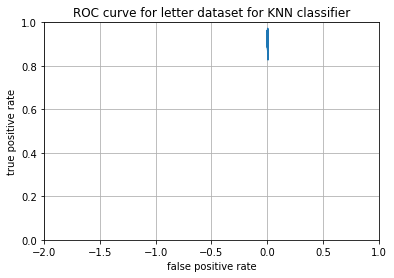

In [36]:
plt.plot(FPR3,TPR3)
plt.xlim([-2.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for letter dataset for KNN classifier")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)

In [37]:
d21=pd.DataFrame(FP3,columns=['knnfp'])

In [38]:
d22=pd.DataFrame(TP3,columns=['knntp'])
d23=pd.DataFrame(y_predicted,columns=['prd3'])
d24=pd.DataFrame(TN3,columns=['knntn'])
d25=pd.DataFrame(TPR3,columns=['knntpr'])
d26=pd.DataFrame(TNR3,columns=['knntnr'])
d27=pd.DataFrame(PPV3,columns=['knnppv'])
d28=pd.DataFrame(NPV3,columns=['knnnpv'])

# RANDOM FOREST #

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model=RandomForestClassifier(n_estimators=100)

In [41]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
y_predicted=model.predict(X_test)

In [43]:
model.score(X_test,y_test)

0.9614

In [44]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of random forest classifier for letter dataset')

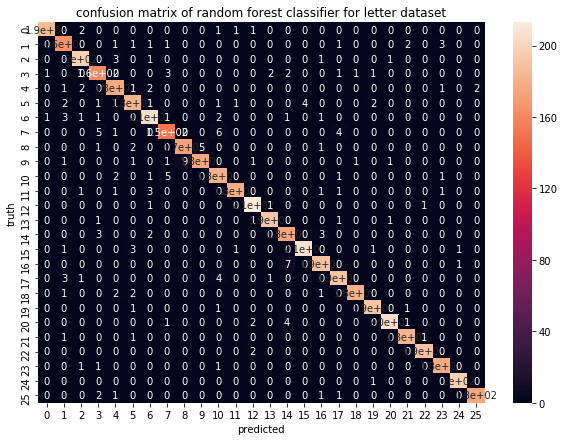

In [45]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of random forest classifier for letter dataset")

In [46]:
FP4 = cm.sum(axis=0) - np.diag(cm)  
FN4 = cm.sum(axis=1) - np.diag(cm)
TP4 = np.diag(cm)
TN4 = cm.sum() - (FP4 + FN4 + TP4)

# Sensitivity, hit rate, recall, or true positive rate
TPR4 = TP4/(TP4+FN4)
# Specificity or true negative rate
TNR4 = TN4/(TN4+FP4) 
# Precision or positive predictive value
PPV4 = TP4/(TP4+FP4)
# Negative predictive value
NPV4 = TN4/(TN4+FN4)
# Fall out or false positive rate
FPR4 = FP4/(FP4+TN4)
# False negative rate
FNR4 = FN4/(TP4+FN4)
# False discovery rate
FDR4 = FP4/(TP4+FP4)

# Overall accuracy
ACC = (TP4+TN4)/(TP4+FP4+FN4+TN4)
print(FP4,FN4,TP4,TN4)

[ 2 13  8 15 12 12 12 12  9  5 16  3  7  4 14  4  9 10  2  5  3  4  2  6
  2  2] [ 5 10  6 11  9 13 11 16  9 15 10  8  3  4  8  7  8  9  6  3  8  3  2  3
  1  5] [186 165 197 162 178 183 206 152 173 176 181 179 213 192 175 208 190 191
 180 192 205 183 190 178 197 175] [4807 4812 4789 4812 4801 4792 4771 4820 4809 4804 4793 4810 4777 4800
 4803 4781 4793 4790 4812 4800 4784 4810 4806 4813 4800 4818]


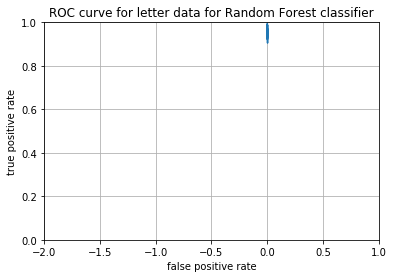

In [47]:
plt.plot(FPR4,TPR4)
plt.xlim([-2.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for letter data for Random Forest classifier")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)

In [48]:
d31=pd.DataFrame(FP4,columns=['rffp'])

In [49]:
d32=pd.DataFrame(TP4,columns=['rftp'])
d33=pd.DataFrame(y_predicted,columns=['prd4'])
d34=pd.DataFrame(TN4,columns=['rftn'])
d35=pd.DataFrame(TPR4,columns=['rftpr'])
d36=pd.DataFrame(TNR4,columns=['rftnr'])
d37=pd.DataFrame(PPV4,columns=['rfppv'])
d38=pd.DataFrame(NPV4,columns=['rfnpv'])

# MLP #

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
mlp=MLPClassifier(max_iter=1500,random_state=300)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=300, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [11]:
mlp.score(X_test,y_test)

0.954

In [12]:
y_predicted=mlp.predict(X_test)

In [13]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of MLP classifier for letter dataset')

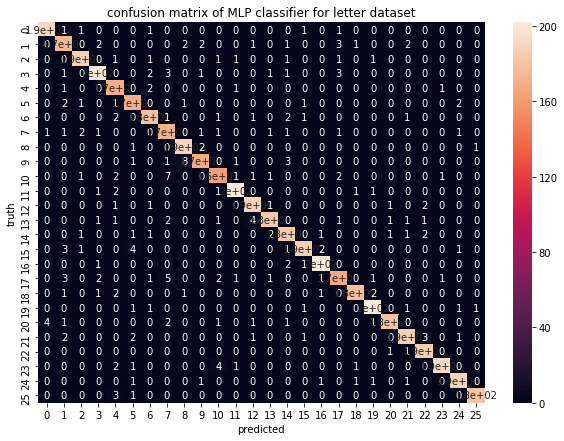

In [14]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of MLP classifier for letter dataset")

In [15]:
FP5 = cm.sum(axis=0) - np.diag(cm)  
FN5 = cm.sum(axis=1) - np.diag(cm)
TP5 = np.diag(cm)
TN5 = cm.sum() - (FP5 + FN5 + TP5)

# Sensitivity, hit rate, recall, or true positive rate
TPR5 = TP5/(TP5+FN5)
# Specificity or true negative rate
TNR5 = TN5/(TN5+FP5) 
# Precision or positive predictive value
PPV5 = TP5/(TP5+FP5)
# Negative predictive value
NPV5 = TN5/(TN5+FN5)
# Fall out or false positive rate
FPR5 = FP5/(FP5+TN5)
# False negative rate
FNR5 = FN5/(TP5+FN5)
# False discovery rate
FDR5 = FP5/(TP5+FP5)

# Overall accuracy
ACC = (TP5+TN5)/(TP5+FP5+FN5+TN5)
print(FP5,FN5,TP5,TN5)
print(TPR5,TNR5,PPV5,NPV5)

[ 5 16  7  9 17 13 10 21 12  7 12  6  9  7 13  6  6 12  4  7  4  8  8  3
  6  2] [ 5 14  7 12  5  8  9 11  4 14 16  6  6 13 10 12  4 18  8  6 11 10  2  9
  6  4] [191 174 187 201 169 170 179 171 190 169 162 202 188 183 184 187 200 168
 178 202 180 187 186 193 188 181] [4799 4796 4799 4778 4809 4809 4802 4797 4794 4810 4810 4786 4797 4797
 4793 4795 4790 4802 4810 4785 4805 4795 4804 4795 4800 4813]
[0.9744898  0.92553191 0.96391753 0.94366197 0.97126437 0.95505618
 0.95212766 0.93956044 0.97938144 0.92349727 0.91011236 0.97115385
 0.96907216 0.93367347 0.94845361 0.93969849 0.98039216 0.90322581
 0.95698925 0.97115385 0.94240838 0.94923858 0.9893617  0.95544554
 0.96907216 0.97837838] [0.9989592  0.99667498 0.99854349 0.99811991 0.99647741 0.99730402
 0.99792186 0.99564134 0.99750312 0.99854681 0.99751141 0.99874791
 0.99812734 0.99854288 0.99729505 0.99875026 0.99874896 0.99750727
 0.99916909 0.99853923 0.99916823 0.99833437 0.99833749 0.99937474
 0.99875156 0.99958463] [0.9744898  0.

In [16]:
NPV5

array([0.9989592 , 0.9970894 , 0.99854349, 0.99749478, 0.99896136,
       0.99833922, 0.99812929, 0.99771215, 0.99916632, 0.99709784,
       0.99668462, 0.99874791, 0.99875078, 0.9972973 , 0.99791797,
       0.99750364, 0.99916562, 0.99626556, 0.99833956, 0.99874765,
       0.99771595, 0.99791883, 0.99958385, 0.99812656, 0.99875156,
       0.99916961])

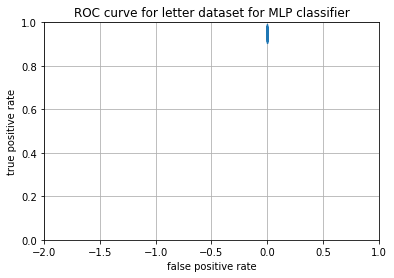

In [17]:
plt.plot(FPR5,TPR5)
plt.xlim([-2.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for letter dataset for MLP classifier")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)

In [18]:
d51=pd.DataFrame(FP5,columns=['mlpfp'])
d52=pd.DataFrame(TP5,columns=['mlptp'])
d53=pd.DataFrame(y_predicted,columns=['prd5'])
d54=pd.DataFrame(TN5,columns=['mlptn'])
d55=pd.DataFrame(TPR5,columns=['mlptpr'])
d56=pd.DataFrame(TNR5,columns=['mlptnr'])
d57=pd.DataFrame(PPV5,columns=['mlpppv'])
d58=pd.DataFrame(NPV5,columns=['mlpnpv'])

# NAIVE BAYES #

In [59]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [60]:
bnb=BernoulliNB(binarize=0.1)
bnb.fit(X_train,y_train)
bnb.score(X_test,y_test)

0.4356

In [61]:
y_predicted=bnb.predict(X_test)

In [62]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of Naive-Bayes(Barnouli) classifier for letter dataset')

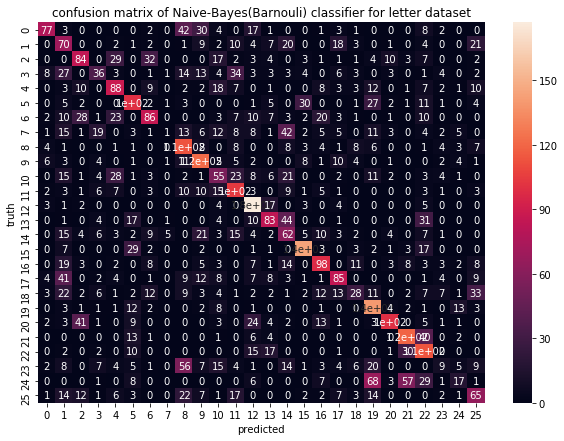

In [63]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of Naive-Bayes(Barnouli) classifier for letter dataset")

In [64]:
FP6 = cm.sum(axis=0) - np.diag(cm)  
FN6 = cm.sum(axis=1) - np.diag(cm)
TP6 = np.diag(cm)
TN6 = cm.sum() - (FP6 + FN6 + TP6)

# Sensitivity, hit rate, recall, or true positive rate
TPR6 = TP6/(TP6+FN6)
# Specificity or true negative rate
TNR6 = TN6/(TN6+FP6) 
# Precision or positive predictive value
PPV6 = TP6/(TP6+FP6)
# Negative predictive value
NPV6 = TN6/(TN6+FN6)
# Fall out or false positive rate
FPR6 = FP6/(FP6+TN6)
# False negative rate
FNR6 = FN6/(TP6+FN6)
# False discovery rate
FDR6 = FP6/(TP6+FP6)

# Overall accuracy
ACC = (TP6+TN6)/(TP6+FP6+FN6+TN6)
print(FP6,FN6,TP6,TN6)

[ 38 221 108  65 114 117  91   9 194 138 134 141 143  91 184  67  97  87
  50 189  39 107 205  41  39 113] [114 105 119 137  99  96 131 167  68  69 136  83  39 113 121  71 100 115
 158  55 113  67  78 172 181 115] [ 77  70  84  36  88 100  86   1 114 122  55 104 177  83  62 144  98  85
  28 140 100 119 114   9  17  65] [4771 4604 4689 4762 4699 4687 4692 4823 4624 4671 4675 4672 4641 4713
 4633 4718 4705 4713 4764 4616 4748 4707 4603 4778 4763 4707]


In [65]:
d61=pd.DataFrame(FP6,columns=['bnbfp'])
d62=pd.DataFrame(TP6,columns=['bnbtp'])
d63=pd.DataFrame(y_predicted,columns=['prd6'])
d64=pd.DataFrame(TN6,columns=['bnbtn'])
d65=pd.DataFrame(TPR6,columns=['bnbtpr'])
d66=pd.DataFrame(TNR6,columns=['bnbtnr'])
d67=pd.DataFrame(PPV6,columns=['bnbppv'])
d68=pd.DataFrame(NPV6,columns=['bnbnpv'])

In [66]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.642

In [67]:
y_predicted=gnb.predict(X_test)

In [68]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of Naive-Bayes(Gaussian) classifier for letter dataset')

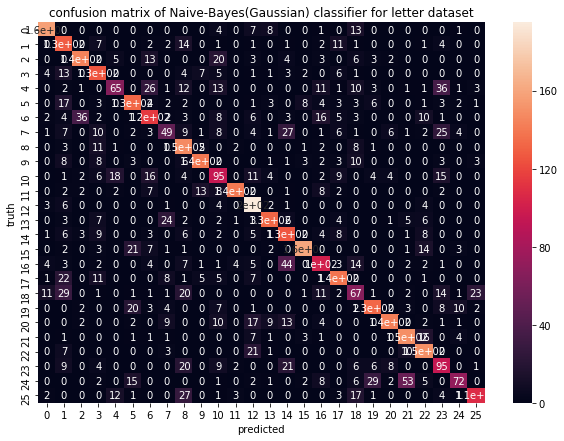

In [69]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of Naive-Bayes(Gaussian) classifier for letter dataset")

# SVM #

In [19]:
from sklearn.svm import SVC

In [20]:
model=SVC(gamma='scale')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
y_predicted=model.predict(X_test)

In [22]:
model.score(X_test,y_test)

0.9434

In [23]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of SVM classifier for text-nontext classifier')

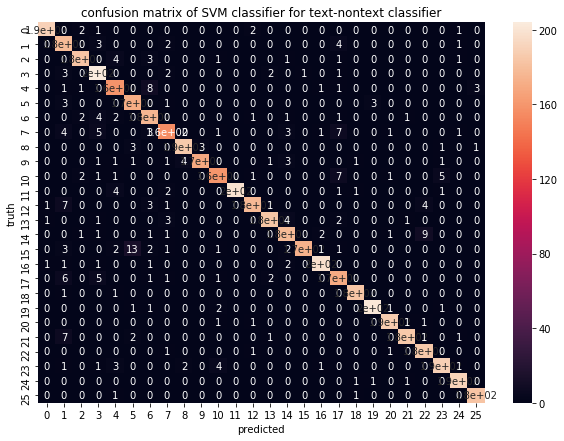

In [24]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of SVM classifier for text-nontext classifier")

In [25]:
FP8 = cm.sum(axis=0) - np.diag(cm)  
FN8 = cm.sum(axis=1) - np.diag(cm)
TP8 = np.diag(cm)
TN8 = cm.sum() - (FP8 + FN8 + TP8)

# Sensitivity, hit rate, recall, or true positive rate
TPR8 = TP8/(TP8+FN8)
# Specificity or true negative rate
TNR8 = TN8/(TN8+FP8) 
# Precision or positive predictive value
PPV8 = TP8/(TP8+FP8)
# Negative predictive value
NPV8 = TN8/(TN8+FN8)
# Fall out or false positive rate
FPR8 = FP8/(FP8+TN8)
# False negative rate
FNR8 = FN8/(TP8+FN8)
# False discovery rate
FDR8 = FP8/(TP8+FP8)

# Overall accuracy
ACC = (TP8+TN8)/(TP8+FP8+FN8+TN8)
print(FP8,FN8,TP8,TN8)
print(TPR8 ,TNR8 ,PPV8 ,NPV8 )
print(ACC)

[ 3 37  8 24 19 20 23 16  6  3 11  0  6  7 16  1  6 26  4  4  5  4 15  9
  6  4] [ 6 10 11  9 15  7 12 26  8 14 18  9 17 12 16 26  6 16  2  6  4 12  3 13
  3  2] [190 178 183 204 159 171 176 156 186 169 160 199 177 184 178 173 198 170
 184 202 187 185 185 189 191 183] [4801 4775 4798 4763 4807 4802 4789 4802 4800 4814 4811 4792 4800 4797
 4790 4800 4790 4788 4810 4788 4804 4799 4797 4789 4800 4811]
[0.96938776 0.94680851 0.94329897 0.95774648 0.9137931  0.96067416
 0.93617021 0.85714286 0.95876289 0.92349727 0.8988764  0.95673077
 0.91237113 0.93877551 0.91752577 0.86934673 0.97058824 0.91397849
 0.98924731 0.97115385 0.97905759 0.93908629 0.98404255 0.93564356
 0.98453608 0.98918919] [0.99937552 0.99231089 0.99833541 0.99498642 0.99606299 0.99585234
 0.99522028 0.99667912 0.99875156 0.99937721 0.99771879 1.
 0.99875156 0.99854288 0.99667083 0.99979171 0.99874896 0.99459909
 0.99916909 0.99916528 0.99896028 0.99916719 0.99688279 0.99812422
 0.99875156 0.99916926] [0.98445596 0.82790698

In [26]:
NPV8

array([0.99875182, 0.99791014, 0.99771262, 0.998114  , 0.99688926,
       0.9985444 , 0.99750052, 0.99461475, 0.99833611, 0.99710025,
       0.99627252, 0.99812539, 0.99647083, 0.99750468, 0.99667083,
       0.99461252, 0.99874896, 0.99666944, 0.99958437, 0.99874844,
       0.99916805, 0.99750572, 0.999375  , 0.99729279, 0.99937539,
       0.99958446])

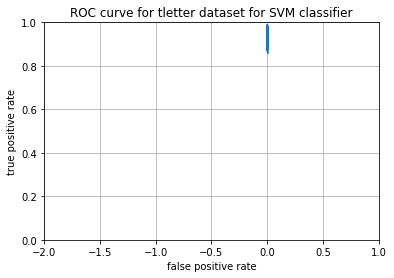

In [27]:
plt.plot(FPR8,TPR8)
plt.xlim([-2.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for tletter dataset for SVM classifier")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)

In [28]:
d41=pd.DataFrame(FP8,columns=['svmfp'])
d42=pd.DataFrame(TP8,columns=['svmtp'])
d43=pd.DataFrame(y_predicted,columns=['prd8'])
d44=pd.DataFrame(TN8,columns=['svmtn'])
d45=pd.DataFrame(TPR8,columns=['svmtpr'])
d46=pd.DataFrame(TNR8,columns=['svmtnr'])
d47=pd.DataFrame(PPV8,columns=['svmppv'])
d48=pd.DataFrame(NPV8,columns=['svmnpv'])

In [100]:
d=pd.read_csv("E:/d.csv")
d

,MLP,SVM
0,0.9985,0.9979
1,0.9977,0.9998
2,0.9983,0.9962
3,0.9977,0.9977
4,0.9975,0.9979
5,0.9964,0.9970
6,0.9974,0.9976
7,0.9970,0.9944
8,0.9989,0.9985
9,0.9970,0.9968


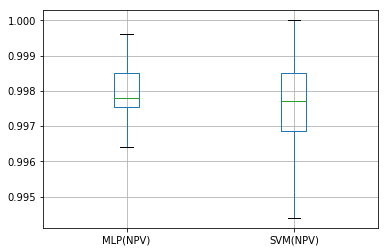

In [101]:
pd.DataFrame({'MLP(NPV)':d.MLP,'SVM(NPV)':d.SVM}).boxplot()

In [102]:
M1=[]
for i in range(0,2):
    M1.append(TP5[i]-TP8[i])
print(M1)

[3, -2]


In [103]:
d=pd.DataFrame(M1,columns=['tp'])

# ONE-SAMPLE-T-TEST #

In [104]:
from scipy.stats import ttest_1samp

In [105]:
tset, pval = ttest_1samp(d['tp'], 0)

In [106]:
pval

0.8743340836219977

In [107]:
M1=[]
for i in range(0,2):
    M1.append(TN5[i]-TN8[i])
print(M1)

[0, 16]


In [108]:
d=pd.DataFrame(M1,columns=['tn'])

In [109]:
tset, pval = ttest_1samp(d['tn'], 0)

In [110]:
pval

0.49999999999999956

In [111]:
M1=[]
for i in range(0,2):
    M1.append(TPR5[i]-TPR8[i])
print(M1)

[0.015706806282722585, -0.011428571428571455]


In [112]:
d=pd.DataFrame(M1,columns=['tn'])

In [113]:
tset, pval = ttest_1samp(d['tn'], 0)

In [114]:
pval

0.90044832713159

In [115]:
M1=[]
for i in range(0,2):
    M1.append(TNR5[i]-TNR8[i])
print(M1)

[0.0, 0.003316062176165757]


In [116]:
tset, pval = ttest_1samp(d['tn'], 0)

In [117]:
pval

0.90044832713159

In [118]:
M1=[]
for i in range(0,2):
    M1.append(PPV5[i]-PPV8[i])
print(M1)

[0.00042669397508099394, 0.0761480787253983]


In [119]:
tset, pval = ttest_1samp(d['tn'], 0)

In [120]:
pval

0.90044832713159

In [121]:
M1=[]
for i in range(0,2):
    M1.append(NPV5[i]-NPV8[i])
print(M1)

[0.0006222756549891795, -0.0004076061639368689]


In [122]:
tset, pval = ttest_1samp(d['tn'], 0)

In [123]:
pval

0.90044832713159

# TWO-SAMPLE-T-TEST #

In [124]:
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests

In [127]:
ttest,pval = ttest_ind(d42['svmtp'],d52['mlptp'])
print("p-value",pval)

p-value 0.6175753569209255


In [128]:
ttest,pval = ttest_ind(d44['svmtn'],d54['mlptn'])
print("p-value",pval)

p-value 0.5774916876544569


In [129]:
ttest,pval = ttest_ind(d45['svmtpr'],d55['mlptpr'])
print("p-value",pval)

p-value 0.14910252841676774


In [130]:
ttest,pval = ttest_ind(d46['svmtnr'],d56['mlptnr'])
print("p-value",pval)

p-value 0.3218957959431002


In [131]:
ttest,pval = ttest_ind(d47['svmppv'],d57['mlpppv'])
print("p-value",pval)

p-value 0.3520657404871945


In [132]:
ttest,pval = ttest_ind(d48['svmnpv'],d58['mlpnpv'])
print("p-value",pval)

p-value 0.13661128709157022


In [133]:
contingency_table=pd.crosstab(d43["prd8"],d53["prd5"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 prd5    A    B    C    D    E    F    G    H    I    J  ...    Q    R    S  \
prd8                                                    ...                  
A     178    0    0    0    0    0    1    1    1    2  ...    0    0    2   
B       0  165    0    2    2    0    0    5    0    0  ...    1    3    2   
C       1    0  182    0    1    0    3    0    1    0  ...    0    0    0   
D       0    2    0  162    0    1    0    7    1    1  ...    0    2    1   
E       0    0    8    0  174    3    0    0    0    0  ...    1    0    3   
F       0    0    0    0    0  175    1    1    4    0  ...    0    1    1   
G       0    2    5    0    6    0  204    4    0    0  ...    0    0    0   
H       1    0    0    4    1    1    2  142    0    0  ...    0    1    0   
I       0    0    0    0    0    0    0    0  180    2  ...    0    0    2   
J       0    0    0    0    0    0    0    0    5  176  ...    0    0    0   
K       2    0    1    0    1    0    0   

Text(0.5, 1.0, 'contingency matrix for letter classifier')

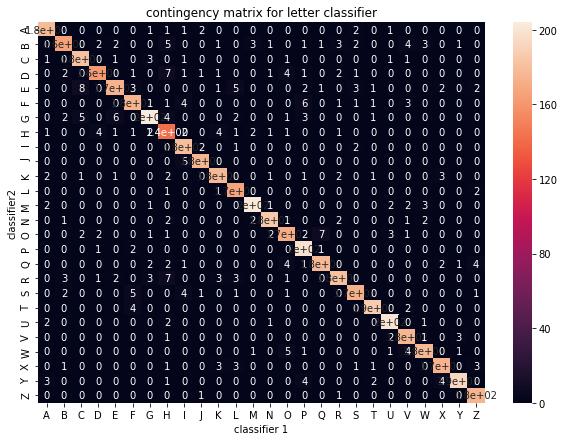

In [135]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(contingency_table,annot=True)
plt.xlabel("classifier 1")
plt.ylabel("classifier2")
plt.title("contingency matrix for letter classifier")

In [136]:
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[178   0   0   0   0   0   1   1   1   2   0   0   0   0   0   0   0   0
    2   0   1   0   0   0   0   0]
 [  0 165   0   2   2   0   0   5   0   0   1   0   3   1   0   1   1   3
    2   0   0   4   3   0   1   0]
 [  1   0 182   0   1   0   3   0   1   0   0   0   0   0   1   0   0   0
    0   0   1   1   0   0   0   0]
 [  0   2   0 162   0   1   0   7   1   1   1   0   0   1   4   1   0   2
    1   0   0   0   0   0   0   0]
 [  0   0   8   0 174   3   0   0   0   0   1   5   0   0   0   2   1   0
    3   1   0   0   0   2   0   2]
 [  0   0   0   0   0 175   1   1   4   0   0   0   0   0   0   6   0   1
    1   1   0   3   0   0   0   0]
 [  0   2   5   0   6   0 204   4   0   0   0   2   0   0   1   3   0   0
    0   1   0   0   0   0   0   0]
 [  1   0   0   4   1   1   2 142   0   0   4   1   2   1   1   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 180   2   0   1   0   0   0   0   0   0
    2   0   0   0   0   0   0   0]

Text(0.5, 1.0, 'Observed_Values for letter classifier')

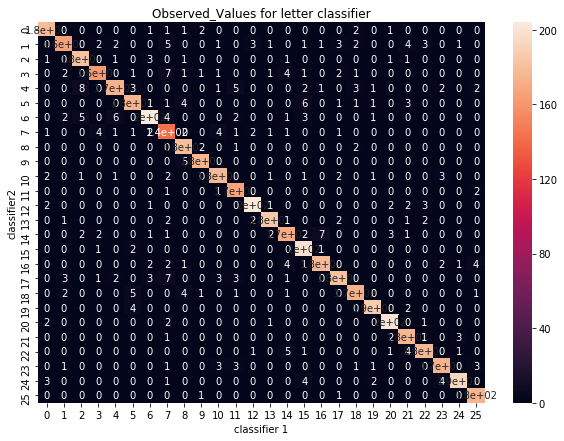

In [137]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(Observed_Values,annot=True)
plt.xlabel("classifier 1")
plt.ylabel("classifier2")
plt.title("Observed_Values for letter classifier")

In [138]:
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[ 7.0308  6.5472  7.3656  6.3984  6.9564  7.1052  8.1096  6.696   7.3284
   6.8076  7.1052  6.8076  7.812   7.1796  7.068   8.2212  6.9564  7.1796
   6.882   7.2168  7.812   7.2168  6.9564  6.882   7.4028  6.9564]
 [ 7.3332  6.8288  7.6824  6.6736  7.2556  7.4108  8.4584  6.984   7.6436
   7.1004  7.4108  7.1004  8.148   7.4884  7.372   8.5748  7.2556  7.4884
   7.178   7.5272  8.148   7.5272  7.2556  7.178   7.7212  7.2556]
 [ 7.2198  6.7232  7.5636  6.5704  7.1434  7.2962  8.3276  6.876   7.5254
   6.9906  7.2962  6.9906  8.022   7.3726  7.258   8.4422  7.1434  7.3726
   7.067   7.4108  8.022   7.4108  7.1434  7.067   7.6018  7.1434]
 [ 6.9552  6.4768  7.2864  6.3296  6.8816  7.0288  8.0224  6.624   7.2496
   6.7344  7.0288  6.7344  7.728   7.1024  6.992   8.1328  6.8816  7.1024
   6.808   7.1392  7.728   7.1392  6.8816  6.808   7.3232  6.8816]
 [ 7.6356  7.1104  7.9992  6.9488  7.5548  7.7164  8.8072  7.272   7.9588
   7.3932  7.7164  7.3932  8.484   7.7972  7.6

Text(0.5, 1.0, 'Expected_Values for letter classifier')

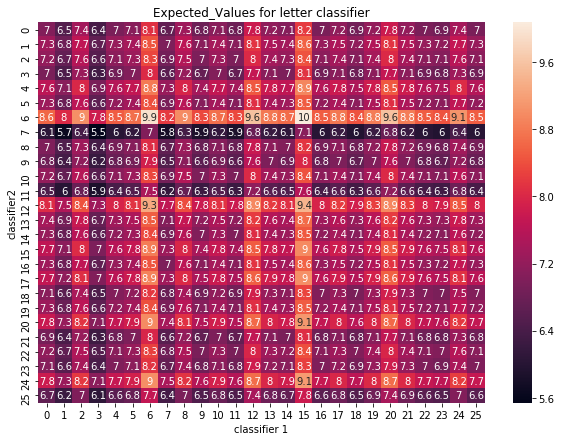

In [140]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(Expected_Values,annot=True)
plt.xlabel("classifier 1")
plt.ylabel("classifier2")
plt.title("Expected_Values for letter classifier")

In [141]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


# CHI-SQUARE-TEST #

In [142]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)

print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

chi-square statistic:- 8134.536762186658
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 8134.536762186658
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


# MANN-WHITNEY-TEST #

In [29]:
t,p= scipy.stats.mannwhitneyu(d42['svmtp'],d52['mlptp'], use_continuity=True, alternative="two-sided")

In [30]:
p

0.5516703819627089

In [31]:
t,p= scipy.stats.mannwhitneyu(d44['svmtn'],d54['mlptn'], use_continuity=True, alternative="two-sided")

In [32]:
p

0.7903898055359375

In [33]:
t,p= scipy.stats.mannwhitneyu(d45['svmtpr'],d55['mlptpr'], use_continuity=True, alternative="two-sided")

In [34]:
p

0.3320029621781616

In [35]:
t,p= scipy.stats.mannwhitneyu(d46['svmtnr'],d56['mlptnr'], use_continuity=True, alternative="two-sided")

In [36]:
p

0.833260195752764

In [37]:
t,p= scipy.stats.mannwhitneyu(d47['svmppv'],d57['mlpppv'], use_continuity=True, alternative="two-sided")

In [38]:
p

0.9489270966603816

In [39]:
t,p= scipy.stats.mannwhitneyu(d48['svmnpv'],d58['mlpnpv'], use_continuity=True, alternative="two-sided")

In [40]:
p

0.3275238088252972

# KOLMOGORV-SMIRNOV-TEST #

In [41]:
from scipy.stats import ks_2samp

In [42]:
f,p=ks_2samp(d42['svmtp'],d52['mlptp'])

In [43]:
p

0.8921769959310172

In [44]:
f,p=ks_2samp(d44['svmtn'],d54['mlptn'])

In [45]:
p

0.6738309195262774

In [46]:
f,p=ks_2samp(d45['svmtpr'],d55['mlptpr'])

In [47]:
p

0.25813832463283987

In [48]:
f,p=ks_2samp(d46['svmtnr'],d56['mlptnr'])

In [49]:
p

0.44018710835583

In [50]:
f,p=ks_2samp(d47['svmppv'],d57['mlpppv'])

In [51]:
p

0.44018710835583

In [52]:
f,p=ks_2samp(d48['svmnpv'],d58['mlpnpv'])

In [53]:
p

0.6738309195262769